### Configuración de dataset:

### Configuración de dataset:

In [49]:
# Definimos las rutas del dataset 
# Para añadir imagenes al dataset, utilizar 'capturaImagenes.py'
data_dir = r'./Database'

# Definimos algunos parámetros importantes
width_shape = 48
height_shape = 48
num_classes = 5
epochs = 50
batch_size = 32
class_names = ['enojo','felicidad','neutral','sorpresa','tristeza']

# Asignar lista de imágenes e indice a las emociones
import pathlib
import cv2
data_dir = pathlib.Path(data_dir)

emociones_dict = {
    'enojo': list(data_dir.glob('enojo/*')),
    'felicidad': list(data_dir.glob('felicidad/*')),
    'neutral': list(data_dir.glob('neutral/*')),
    'sorpresa': list(data_dir.glob('sorpresa/*')),
    'tristeza': list(data_dir.glob('tristeza/*')),
}
emociones_label_dict = {
    'enojo': 0,
    'felicidad': 1,
    'neutral': 2,
    'sorpresa': 3,
    'tristeza': 4,
}

emociones_dict.items()

dict_items([('enojo', [WindowsPath('Database/enojo/enojo_0.png'), WindowsPath('Database/enojo/enojo_1.png'), WindowsPath('Database/enojo/enojo_10.png'), WindowsPath('Database/enojo/enojo_100.png'), WindowsPath('Database/enojo/enojo_101.png'), WindowsPath('Database/enojo/enojo_102.png'), WindowsPath('Database/enojo/enojo_103.png'), WindowsPath('Database/enojo/enojo_104.png'), WindowsPath('Database/enojo/enojo_105.png'), WindowsPath('Database/enojo/enojo_106.png'), WindowsPath('Database/enojo/enojo_107.png'), WindowsPath('Database/enojo/enojo_108.png'), WindowsPath('Database/enojo/enojo_109.png'), WindowsPath('Database/enojo/enojo_11.png'), WindowsPath('Database/enojo/enojo_110.png'), WindowsPath('Database/enojo/enojo_111.png'), WindowsPath('Database/enojo/enojo_112.png'), WindowsPath('Database/enojo/enojo_113.png'), WindowsPath('Database/enojo/enojo_114.png'), WindowsPath('Database/enojo/enojo_115.png'), WindowsPath('Database/enojo/enojo_116.png'), WindowsPath('Database/enojo/enojo_117.

In [50]:
import numpy as np
# Configuramos el dataset de entrenamiento y validación
X, y = [], []

for emocion, imagenes in emociones_dict.items():
    count = 0
    for imagen in imagenes:
        imagen = cv2.imread(str(imagen), cv2.IMREAD_GRAYSCALE)  # Leer como escala de grises
        count = count + 1
        if imagen is None: 
            print(f"Imagen erronea {emocion}_{count}")
            continue
        imagen = np.expand_dims(imagen, axis=-1)
        
        X.append(imagen)
        y.append(emociones_label_dict[emocion])
        
X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(f"Xshape {X_train.shape}")

Xshape (4500, 48, 48, 1)


### Definir modelo:

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, InputLayer, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomFlip, RandomTranslation

model = Sequential()

## Aumento de datos
data_augmentation = Sequential()
data_augmentation.add(InputLayer(input_shape=(width_shape, height_shape, 1)))
data_augmentation.add(RandomRotation(0.2))
data_augmentation.add(RandomZoom(0.1))
data_augmentation.add(RandomFlip("horizontal"))
data_augmentation.add(RandomTranslation(0.1, 0.1))

model.add(data_augmentation)

## Extracción de Características
model.add(Conv2D(32,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

## Clasificación
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Revisamos el modelo CNN
model.summary()

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Compilamos y estamos listos para el entrenamiento
opt = Adam(learning_rate=1e-4, decay=1e-4 / epochs)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_15 (Sequential)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 3, 3, 512)      │         2,04

 Total params: 1,673,477 (6.38 MB)

 Trainable params: 1,670,725 (6.37 MB)

 Non-trainable params: 2,752 (10.75 KB)

### Entrenamiento:

In [52]:
# Entrenamiento de la red
model.fit(  
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.2845 - loss: 1.7657 - val_accuracy: 0.4164 - val_loss: 1.3980
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.3601 - loss: 1.5331 - val_accuracy: 0.4290 - val_loss: 1.2847
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.3975 - loss: 1.4263 - val_accuracy: 0.4750 - val_loss: 1.3391
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.4288 - loss: 1.3887 - val_accuracy: 0.4277 - val_loss: 1.4316
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.4363 - loss: 1.3464 - val_accuracy: 0.3404 - val_loss: 1.6462
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.4388 - loss: 1.3107 - val_accuracy: 0.4144 - val_loss: 1.4725
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.4533 - loss: 1.2898 - val_accuracy: 0.3471 - val_loss: 1.7917
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.4750 - loss: 1.2483 - 

### Grabar modelo:

In [53]:
model.save("modelFEC.h5")

### Prueba del modelo:

C:\Users\alang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_4750. Received: the structure of inputs=('*',)
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
neutral


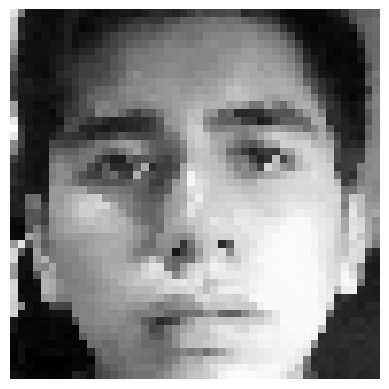

In [54]:
import cv2 
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

faces = []

# Cargamos una imagen del directorio
imaget_path = f"Database/neutral/neutral_2.png"

# Redimensionamos la imagen y convertimos a gray
face = cv2.cvtColor(cv2.imread(imaget_path), cv2.COLOR_BGR2GRAY)
face = cv2.resize(face, (48, 48))
face2 = img_to_array(face)
face2 = np.expand_dims(face2,axis=0)

faces.append(face2)

# El modelo estima la predicción
preds = model.predict(faces)

print(class_names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(face),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()